In [2]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
from magnitude_threshold import abs_sobel_thresh,mag_thresh,dir_threshold
%matplotlib inline

(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)


In [32]:
def sv_color_thresholds(image,sthresh=(0,255),vthresh=(0,255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > sthresh[0]) & (s_channel <= sthresh[1])] = 1
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel > vthresh[0]) & (v_channel <= vthresh[1])] = 1
    
    sv_binary = np.zeros_like(s_channel)
    sv_binary[(s_binary == 1) & ( v_binary == 1)] = 1
    return sv_binary
    

def s_color_thresholds(image,sthresh=(0,255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > sthresh[0]) & (s_channel <= sthresh[1])] = 1
    return s_binary   

In [33]:
dist_pickle = np.load(open("camera_cal/dist_pickle.p","rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

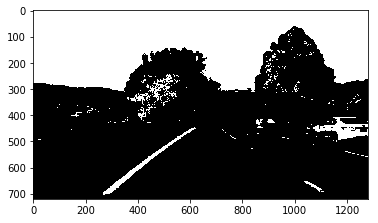

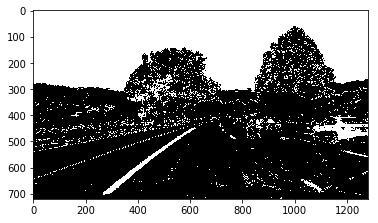

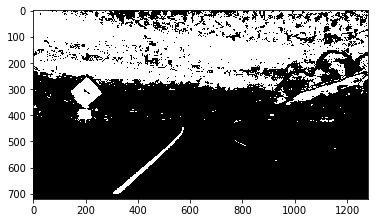

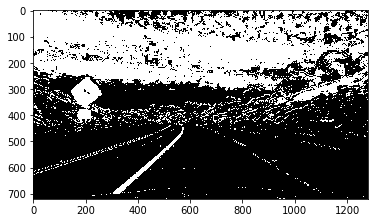

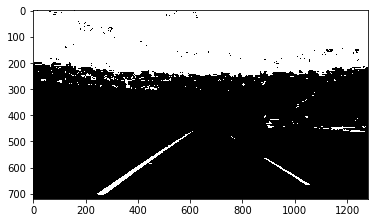

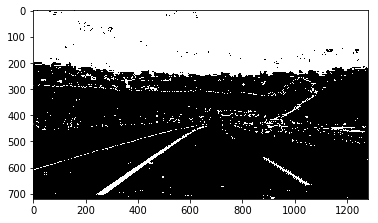

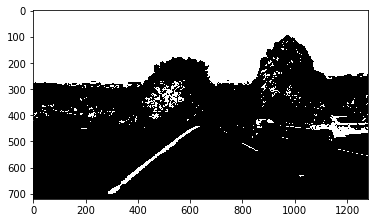

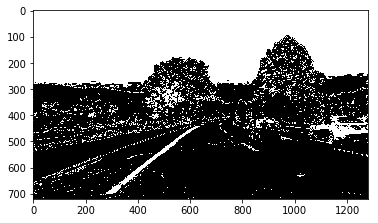

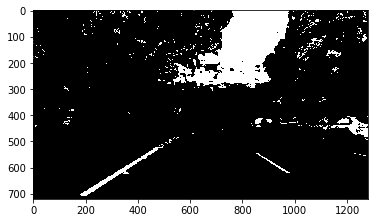

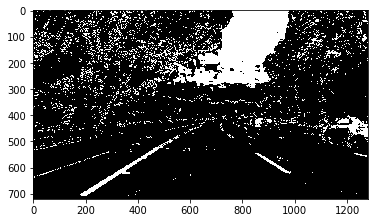

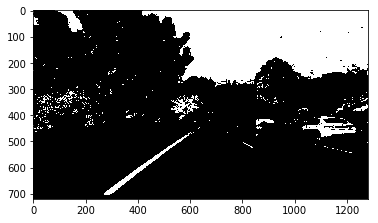

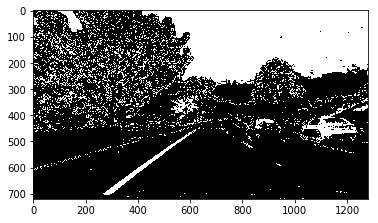

In [34]:
test_images = glob.glob('test_images/test*.jpg')
for idx, fname in enumerate(test_images,1):
    bgrtimg = cv2.imread(fname)
    rgbtimg = cv2.cvtColor(bgrtimg, cv2.COLOR_BGR2RGB)
    #rgbtimg = bgrtimg
    timg_size = (rgbtimg.shape[1], rgbtimg.shape[0])
    undistort_test_image = cv2.undistort(rgbtimg, mtx, dist, None, mtx)
    #plt.imshow(undistort_test_image)
    #plt.show()
    #write_name = 'test_images/undistort_test_image'+str(idx)+'.jpg'
    #cv2.imwrite(write_name,cv2.cvtColor(undistort_test_image, cv2.COLOR_RGB2BGR))
    preprocessimage = np.zeros_like(undistort_test_image[:,:,0])
    ksize = 5
    gradx = abs_sobel_thresh(undistort_test_image, orient='x', sobel_kernel=ksize, thresh=(12, 100))
    grady = abs_sobel_thresh(undistort_test_image, orient='y', sobel_kernel=ksize, thresh=(25, 100))
    sv_binary = sv_color_thresholds(undistort_test_image,(100,255),(50,255))
    
    preprocessimage[((gradx == 1) & (grady == 1) | (sv_binary == 1))] = 255
    plt.imshow(sv_binary, cmap='gray')
    plt.show()
    plt.imshow(preprocessimage,cmap='gray')
    plt.show()
    
    
   